## Problem statement
### Lead conversion, which is where the X-education site would be converting promising lead, is poor for this company. We have to make the process more efficient, by identifying potential leads (hot leads). 
"X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%."
#### Leads - 9000 data points
#### Target variable - converted

## 1. Importing libraries and data and understanding it

In [579]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd, numpy as np

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, confusion_matrix, f1_score
from sklearn import metrics

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [580]:
# Importing dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [581]:
lead_data.shape

(9240, 37)

In [582]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [583]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## 2. Data preparation

#### Treating missing values

In [584]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [585]:
# we need to drop columns having more than 2800 missing values, as this can affect our analysis
for col in lead_data.columns:
    if lead_data[col].isnull().sum() > 2800:
        lead_data.drop(col, 1, inplace=True)

In [586]:
#let's check again
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [587]:
# calculating percentage of missing values
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [588]:
for col in lead_data.columns:
    print('-' * 5 + col + '-' * 10 )
    display(lead_data[col].value_counts().head(10))

-----Prospect ID----------


85adf83b-396c-4d8a-8713-e9cf7b25228c    1
da0b52b0-4293-4e64-a28e-598ad892e05e    1
4be71c12-4790-4001-8502-404fc2a7f880    1
ede9bbc5-8db3-443e-a984-e1fcd2a636b7    1
e6b4e01f-2c82-4678-9cb6-93a654013ff7    1
85cb6721-b6d1-46f2-8f7b-a3836c4f25e0    1
fd59d710-35e2-49f0-9565-7eaadc1347b6    1
20bae5db-2d10-4d69-90d0-65a389adb418    1
765adb3b-1a33-4db8-a1f1-cca50e94c9dc    1
b65455ec-afde-42e3-9951-1cc70554501b    1
Name: Prospect ID, dtype: int64

-----Lead Number----------


608255    1
596233    1
656682    1
592824    1
652580    1
583105    1
623906    1
646433    1
599326    1
605469    1
Name: Lead Number, dtype: int64

-----Lead Origin----------


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

-----Lead Source----------


Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
bing                   6
google                 5
Name: Lead Source, dtype: int64

-----Do Not Email----------


No     8506
Yes     734
Name: Do Not Email, dtype: int64

-----Do Not Call----------


No     9238
Yes       2
Name: Do Not Call, dtype: int64

-----Converted----------


0    5679
1    3561
Name: Converted, dtype: int64

-----TotalVisits----------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

-----Total Time Spent on Website----------


0      2193
60       19
127      18
75       18
74       18
157      17
234      17
32       17
87       17
62       17
Name: Total Time Spent on Website, dtype: int64

-----Page Views Per Visit----------


0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

-----Last Activity----------


Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Name: Last Activity, dtype: int64

-----Country----------


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Name: Country, dtype: int64

-----Specialization----------


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Name: Specialization, dtype: int64

-----How did you hear about X Education----------


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

-----What is your current occupation----------


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

-----What matters most to you in choosing a course----------


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

-----Search----------


No     9226
Yes      14
Name: Search, dtype: int64

-----Magazine----------


No    9240
Name: Magazine, dtype: int64

-----Newspaper Article----------


No     9238
Yes       2
Name: Newspaper Article, dtype: int64

-----X Education Forums----------


No     9239
Yes       1
Name: X Education Forums, dtype: int64

-----Newspaper----------


No     9239
Yes       1
Name: Newspaper, dtype: int64

-----Digital Advertisement----------


No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

-----Through Recommendations----------


No     9233
Yes       7
Name: Through Recommendations, dtype: int64

-----Receive More Updates About Our Courses----------


No    9240
Name: Receive More Updates About Our Courses, dtype: int64

-----Update me on Supply Chain Content----------


No    9240
Name: Update me on Supply Chain Content, dtype: int64

-----Get updates on DM Content----------


No    9240
Name: Get updates on DM Content, dtype: int64

-----Lead Profile----------


Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

-----City----------


Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

-----I agree to pay the amount through cheque----------


No    9240
Name: I agree to pay the amount through cheque, dtype: int64

-----A free copy of Mastering The Interview----------


No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

-----Last Notable Activity----------


Modified                    3407
Email Opened                2827
SMS Sent                    2172
Page Visited on Website      318
Olark Chat Conversation      183
Email Link Clicked           173
Email Bounced                 60
Unsubscribed                  47
Unreachable                   32
Had a Phone Conversation      14
Name: Last Notable Activity, dtype: int64

#### columns having maximum 'select' values need to be dropped as our analysis won't be driven by these and can get impacted if we leave them as is

In [589]:
lead_data.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [590]:
# Note: 'Specialization', 'City' column also has select values but in comparison the value is low
# Let's get rid of 'Prospect ID' as we can't use this for getting any meaningful idea about our model
lead_data.drop(['Prospect ID'], axis = 1, inplace = True)

In [591]:
lead_data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [592]:
lead_data.shape

(9240, 28)

In [593]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [594]:
print(len(lead_data.index))
print(len(lead_data.index)/9240)

9240
1.0


#### Mapping variables to binary values

In [595]:
# variables to map
varlist =  ['Do Not Email', 'Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [596]:
lead_data.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.445238,487.698268,2.362820,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,4.854853,548.021466,2.161418,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [597]:
tdata = lead_data.loc[:, lead_data.dtypes == 'object']
tdata.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'City',
       'Last Notable Activity'],
      dtype='object')

#### Making dummy variables for categorical variables

In [598]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'City', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [599]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [600]:
#Dropping the variables for which we created dummies above
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'City', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course','Last Notable Activity'],1)


In [601]:
lead_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Let's get rid of the NaN values

In [602]:
lead_data = lead_data.dropna(axis=0)

In [603]:
lead_data.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


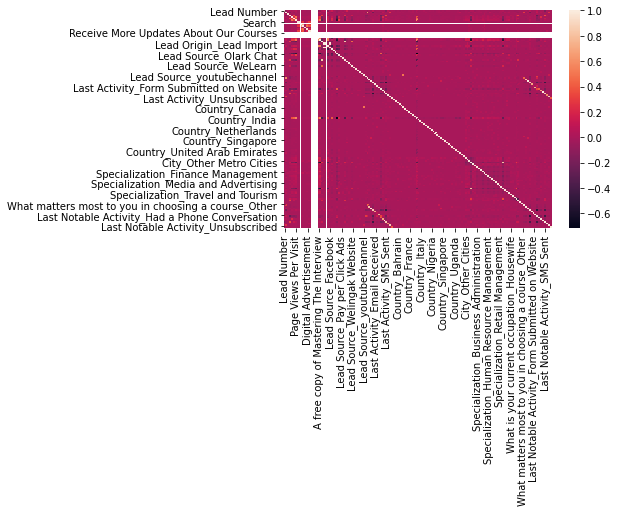

In [604]:
# displaying heatmap
lead_data_plot=sns.heatmap(lead_data.corr()) 

So as a correlation heatmap shows a 2D correlation matrix between two dimensions.

The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color that we obtained above,is proportional to the number of measurements that match the dimensional value. In short, it is a depiction of correlation between variables. As the bar suggests, the color gradient is from white to dark purple, where white shows positive correlation and dark purple shows negative correlation.

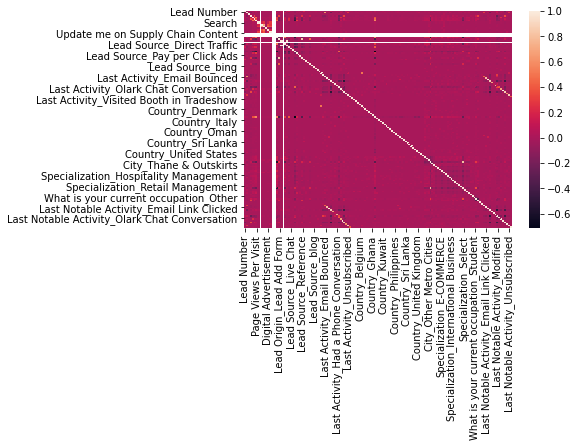

In [605]:
#Dropping the variables for which 
new_ld = lead_data.drop(['A free copy of Mastering The Interview', 'Receive More Updates About Our Courses'],1)
# displaying heatmap
new_ld_plot=sns.heatmap(new_ld.corr()) 

### Splitting the data

In [606]:
#data splitting into test and train
# X will have all the variables except 'Converted', which we will separate out in Y
X=lead_data.drop(['Converted'],1)
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [607]:
Y=lead_data['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [608]:
#data splitting in (0.8 train and 0.2 test)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

### Scaling


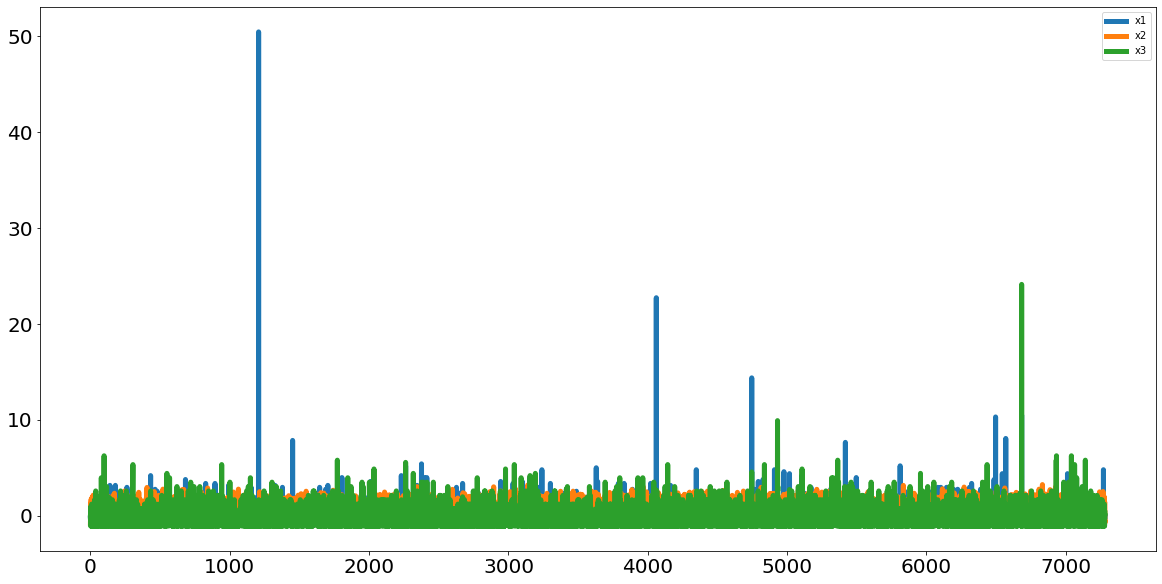

In [609]:
# making use of StandardScaler() for scaling the data
scaler = StandardScaler()
standard_lead = scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
standard_lead = pd.DataFrame(standard_lead, columns =['x1', 'x2', 'x3'])
standard_lead.plot(figsize=(20,10), linewidth=5, fontsize = 20)
plt.show()

In [610]:
standard_lead.head()

,x1,x2,x3
0,-0.298400,-0.771069,-0.164115
1,-0.502299,0.026359,-0.622557
2,-0.706197,-0.881059,-1.080999
3,1.128891,-0.123961,0.981990
4,0.517195,1.041934,0.294327


The data (x_train) is scaled now, and we can use this data for making our model

## 3.Building a model

let's use RFE from sklearn for feature selection

In [611]:
logistic = LogisticRegression()

In [612]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
rfe = RFE(logistic,15)           
rfe = rfe.fit(x_train, y_train)

In [613]:
# all the features selected by REF
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 118),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 5),
 ('TotalVisits', False, 91),
 ('Total Time Spent on Website', False, 106),
 ('Page Views Per Visit', False, 90),
 ('Search', False, 105),
 ('Magazine', False, 121),
 ('Newspaper Article', False, 25),
 ('X Education Forums', False, 80),
 ('Newspaper', False, 66),
 ('Digital Advertisement', False, 61),
 ('Through Recommendations', False, 15),
 ('Receive More Updates About Our Courses', False, 120),
 ('Update me on Supply Chain Content', False, 123),
 ('Get updates on DM Content', False, 119),
 ('I agree to pay the amount through cheque', False, 125),
 ('A free copy of Mastering The Interview', False, 101),
 ('Lead Origin_Landing Page Submission', False, 18),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Origin_Quick Add Form', False, 127),
 ('Lead Source_Direct Traffic', False, 41),
 ('Lead Source_Facebook', False, 16),
 ('Lead Source_Google', False, 84),
 ('L

In [614]:
# now we need to make a variable for keepint all the selected features
var = x_train.columns[rfe.support_]

In [615]:
# we need the x variable from the selected features only
x_train2=x_train[var]

In [616]:
import statsmodels.api as sm #statsmodels importing

In [617]:
x_train2_sm = sm.add_constant(x_train2)
model1 = sm.GLM(y_train, x_train2_sm, family = sm.families.Binomial())
result = model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7266
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3461.4
Date:                Wed, 09 Feb 2022   Deviance:                       6922.9
Time:                        18:52:08   Pearson chi2:                 7.18e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3695      0.082     -4.479      0.000      -0.531      -0.208
Do Not Email                                            -1.7803      0.144    -12.358      0.000      -2.063      -1.498
Lead Origin_Lead Add Form                                2.4741      0.201     12.317      0.000       2.080       2.868
Lead Source_Welingak Website                             1.9452      0.748      2.602      0.009       0.480       3.411
Last Activity_Converted to Lead                         -1.1474      0.187     -6.146      0.000      -1.513      -0.781
Last Activity_Olark Chat Conversation                   -1.6029      0.142    -11.267      0.000      -1.882      -1.324
Country_Qatar                                          -22.2591    1.5e+04     -0.001      0.999   -2.95e+04    2.95e+04
What is your current occupation_Housewife               24.1194   1.77e+04      0.001      0.999   -3.46e+04    3.46e+04
What is your current occupation_Other                    2.2917      0.569      4.027      0.000       1.176       3.407
What is your current occupation_Student                  1.0752      0.204      5.261      0.000       0.675       1.476
What is your current occupation_Unemployed               1.1127      0.075     14.849      0.000       0.966       1.260
What is your current occupation_Working Professional     3.6800      0.176     20.939      0.000       3.336       4.024
Last Notable Activity_Email Link Clicked                -1.8289      0.240     -7.620      0.000      -2.299      -1.358
Last Notable Activity_Email Opened                      -1.3120      0.074    -17.660      0.000      -1.458      -1.166
Last Notable Activity_Modified                          -1.4971      0.081    -18.411      0.000      -1.656      -1.338
Last Notable Activity_Page Visited on Website           -1.4784      0.169     -8.756      0.000      -1.809      -1.147
========================================================================================================================
"""

In [618]:
# let's calculate the VIF for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train2.columns
vif['VIF'] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.91
9,What is your current occupation_Unemployed,1.84
1,Lead Origin_Lead Add Form,1.44
12,Last Notable Activity_Email Opened,1.42
4,Last Activity_Olark Chat Conversation,1.31
2,Lead Source_Welingak Website,1.30
3,Last Activity_Converted to Lead,1.22
10,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.13
14,Last Notable Activity_Page Visited on Website,1.05


#### A VIF of 1 indicates two variables are not correlated ('Country_Qatar', 'What is your current occupation_Housewife'), a VIF between 1 and 5 indicates moderate correlation (most of our variables), and a VIF above 5 would have indicated high correlation, but that is not the case here.

#### But judging from our statistical data, we need to drop 'Country_Qatar','What is your current occupation_Housewife'

In [619]:
x_train2.drop(['Country_Qatar','What is your current occupation_Housewife'], axis=1, inplace=True)

In [620]:
x_train2_sm = sm.add_constant(x_train2)

In [621]:
#refitting the model after dropping the two variables
model2 = sm.OLS(y_train,x_train2_sm).fit()   
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Converted   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     253.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:52:09   Log-Likelihood:                -3705.0
No. Observations:                7282   AIC:                             7438.
Df Residuals:                    7268   BIC:                             7534.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4339      0.013     32.904      0.000       0.408       0.460
Do Not Email                                            -0.2457      0.018    -13.560      0.000      -0.281      -0.210
Lead Origin_Lead Add Form                                0.3460      0.022     15.716      0.000       0.303       0.389
Lead Source_Welingak Website                             0.1767      0.045      3.939      0.000       0.089       0.265
Last Activity_Converted to Lead                         -0.1853      0.024     -7.637      0.000      -0.233      -0.138
Last Activity_Olark Chat Conversation                   -0.2128      0.017    -12.615      0.000      -0.246      -0.180
What is your current occupation_Other                    0.4235      0.108      3.918      0.000       0.212       0.635
What is your current occupation_Student                  0.1668      0.034      4.968      0.000       0.101       0.233
What is your current occupation_Unemployed               0.1810      0.011     16.412      0.000       0.159       0.203
What is your current occupation_Working Professional     0.5568      0.020     27.181      0.000       0.517       0.597
Last Notable Activity_Email Link Clicked                -0.3281      0.037     -8.920      0.000      -0.400      -0.256
Last Notable Activity_Email Opened                      -0.2452      0.013    -19.248      0.000      -0.270      -0.220
Last Notable Activity_Modified                          -0.2612      0.013    -20.099      0.000      -0.287      -0.236
Last Notable Activity_Page Visited on Website           -0.2719      0.027    -10.087      0.000      -0.325      -0.219
==============================================================================
Omnibus:                      891.154   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              464.535
Skew:                           0.467   Prob(JB):                    1.34e-101
Kurtosis:                       2.188   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [622]:
x_testn = sm.add_constant(x_test)
test_col = x_train2_sm.columns
x_testn=x_testn[test_col[1:]]
# Again, Adding constant to test set
x_testn = sm.add_constant(x_testn)
x_testn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 1821 non-null   float64
 1   Do Not Email                                          1821 non-null   int64  
 2   Lead Origin_Lead Add Form                             1821 non-null   uint8  
 3   Lead Source_Welingak Website                          1821 non-null   uint8  
 4   Last Activity_Converted to Lead                       1821 non-null   uint8  
 5   Last Activity_Olark Chat Conversation                 1821 non-null   uint8  
 6   What is your current occupation_Other                 1821 non-null   uint8  
 7   What is your current occupation_Student               1821 non-null   uint8  
 8   What is your current occupation_Unemployed            1

In [623]:
# calculating VIF values once more
vif = pd.DataFrame()
vif['Features'] = x_train2.columns
vif['VIF'] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.91
7,What is your current occupation_Unemployed,1.83
1,Lead Origin_Lead Add Form,1.44
10,Last Notable Activity_Email Opened,1.42
4,Last Activity_Olark Chat Conversation,1.31
2,Lead Source_Welingak Website,1.30
3,Last Activity_Converted to Lead,1.22
8,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.13
12,Last Notable Activity_Page Visited on Website,1.05


The last step has given us decent VIFs and p-values, so let's proceed with model evaluation.

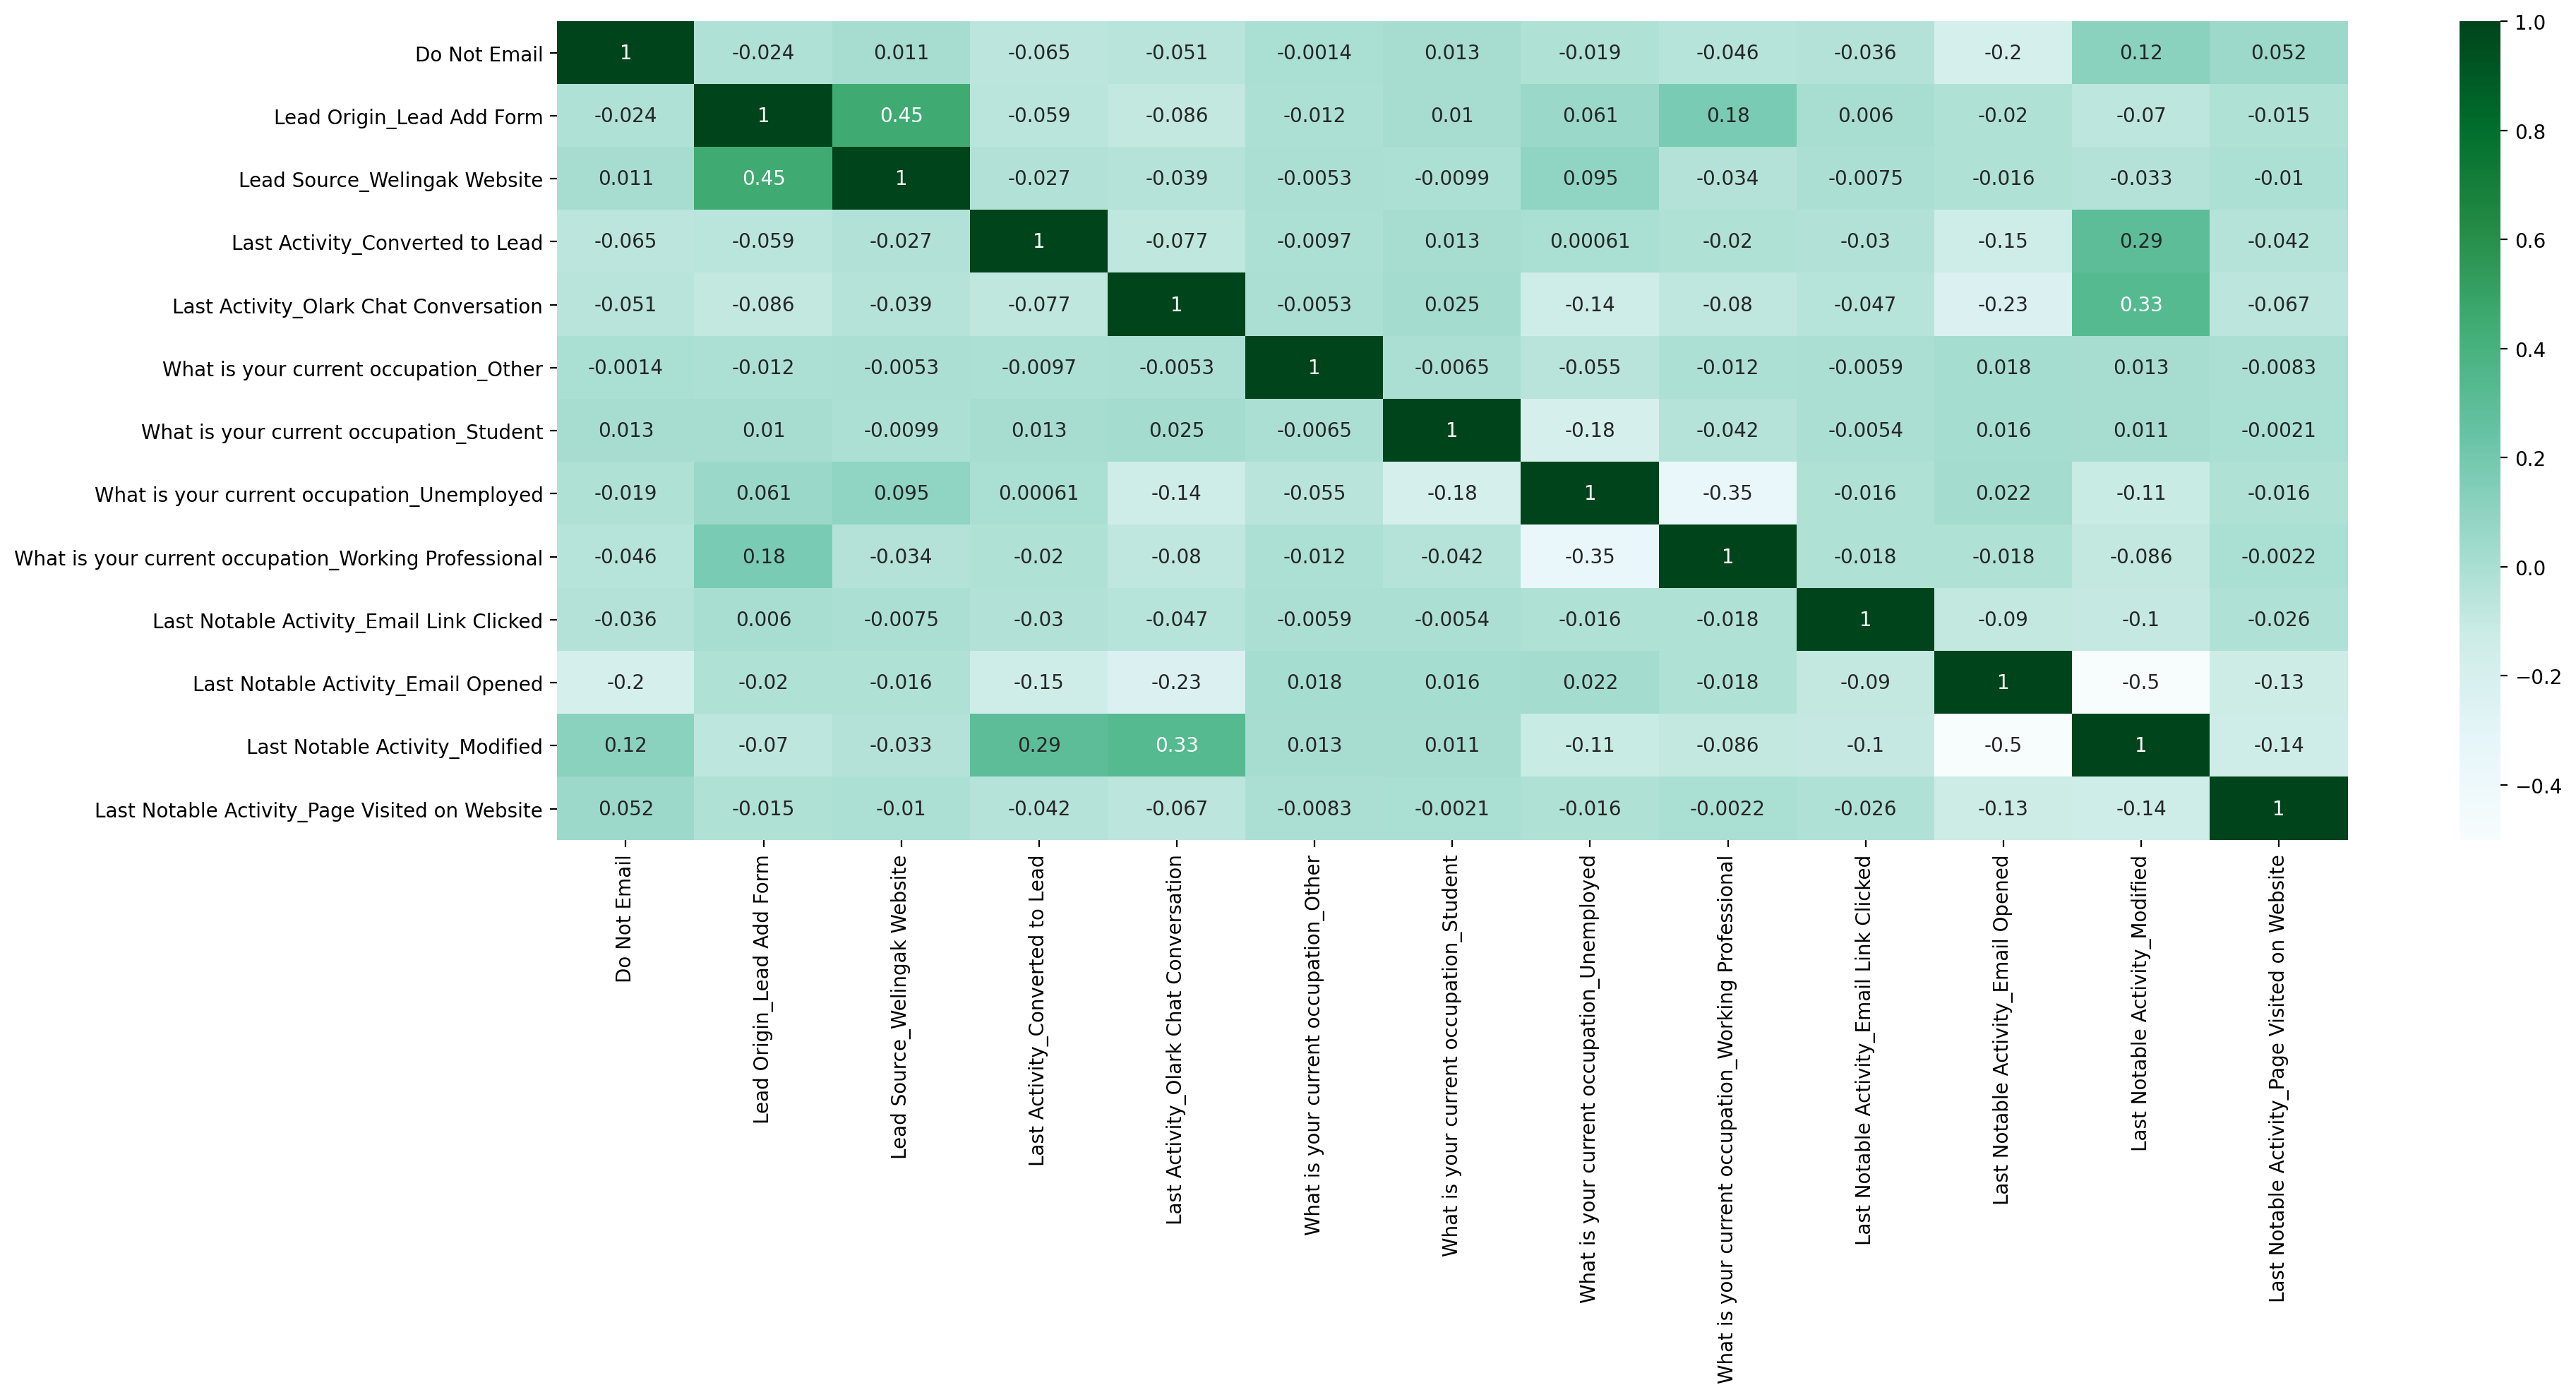

In [624]:
plt.figure(figsize=(20,10), dpi=200, facecolor='w', edgecolor='k', frameon='True')

cor = x_train2.corr()
sns.heatmap(cor, annot=True, cmap="BuGn")

plt.tight_layout()
plt.show()

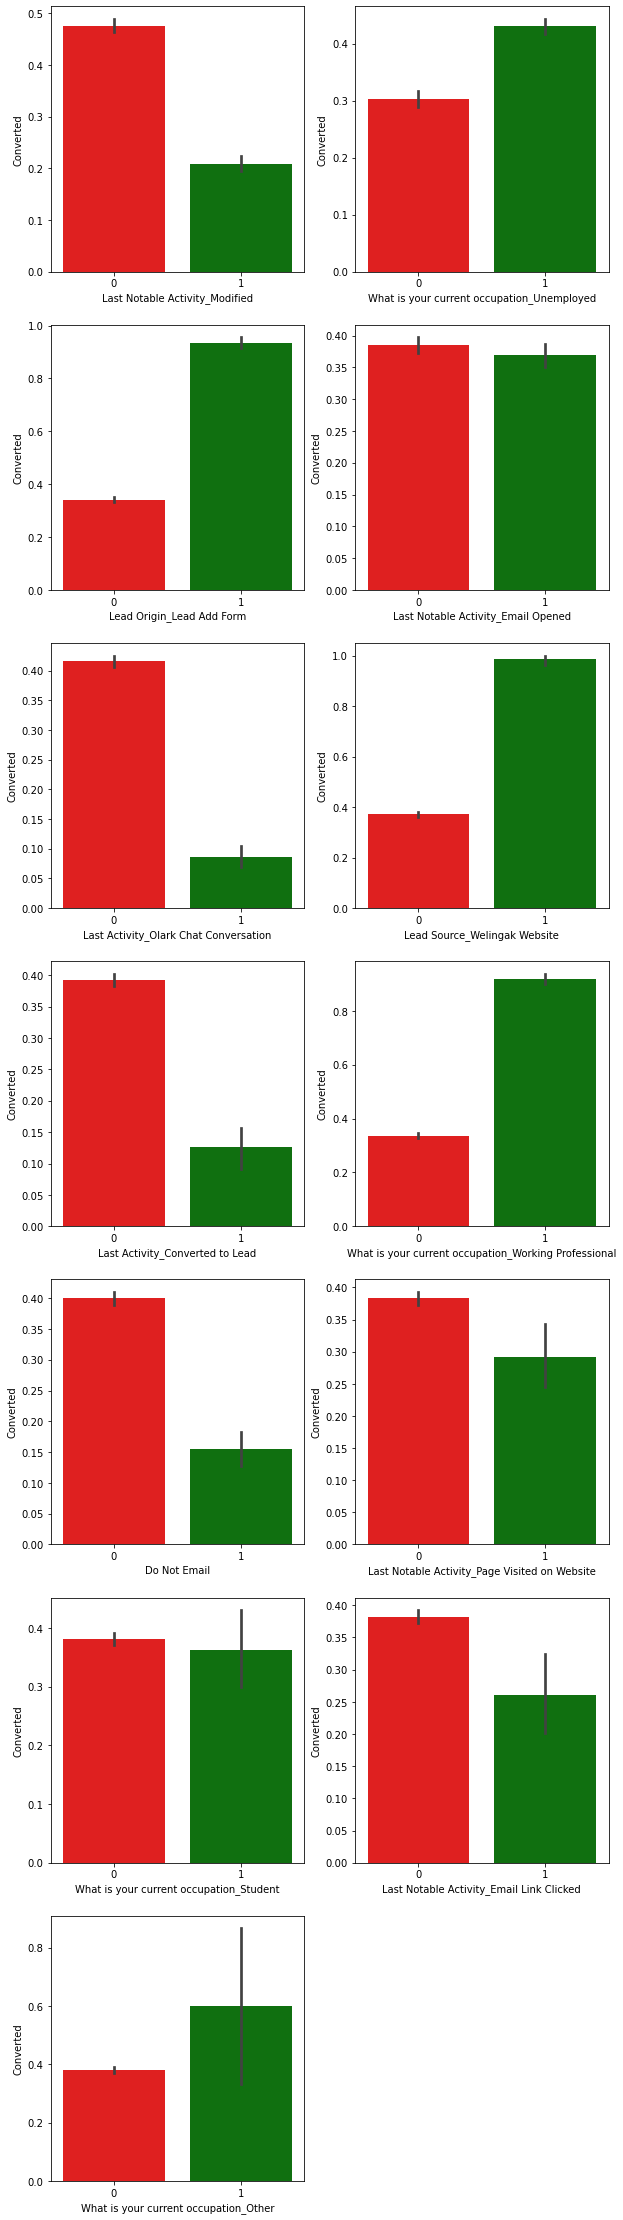

In [625]:
#barplots for the variables we got above
plt.figure(figsize=(10, 40))

colors = ['red', 'green']

plt.subplot(7,2,1)
sns.barplot(x = 'Last Notable Activity_Modified', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,2)
sns.barplot(x = 'What is your current occupation_Unemployed', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,3)
sns.barplot(x = 'Lead Origin_Lead Add Form', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,4)
sns.barplot(x = 'Last Notable Activity_Email Opened', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,5)
sns.barplot(x = 'Last Activity_Olark Chat Conversation', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,6)
sns.barplot(x = 'Lead Source_Welingak Website', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,7)
sns.barplot(x = 'Last Activity_Converted to Lead', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,8)
sns.barplot(x = 'What is your current occupation_Working Professional', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,9)
sns.barplot(x = 'Do Not Email', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,10)
sns.barplot(x = 'Last Notable Activity_Page Visited on Website', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,11)
sns.barplot(x = 'What is your current occupation_Student', y = 'Converted', data = lead_data,palette=colors)
plt.subplot(7,2,12)
sns.barplot(x = 'Last Notable Activity_Email Link Clicked', y = 'Converted', data = lead_data, palette=colors)
plt.subplot(7,2,13)
sns.barplot(x = 'What is your current occupation_Other', y = 'Converted', data = lead_data, palette=colors)
                
plt.show()

From above results, we can infer that, these variables are worth exploring for getting hot leads
- 'What is your current occupation_Unemployed'
- 'Lead origin_Lead Add Form'
- 'Lead source_Welingak Website'
- 'What is your current occupation_Working Professional'
- 'What is your current occupation_Other'

## 4. Model Evaluation

In [626]:
#using predict now
y_pred=model2.predict(x_testn)

In [627]:
y_train_pred = model2.predict(x_train2_sm)
y_train_pred[:10]

9000    0.140864
6902    0.369187
7593    0.188736
1498    0.369700
4137    0.369700
4955    0.990665
1695    0.369700
306     0.369187
2361    1.075395
5028    0.614873
dtype: float64

In [628]:
# Reshaping the predict result into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14086449, 0.36918731, 0.18873648, 0.36969989, 0.36969989,
       0.99066507, 0.36969989, 0.36918731, 1.07539516, 0.61487298])

In [629]:
# for analysing the probabilities predicted by the model
# we will make a new dataframe containing the conversion flag
y_train_pred_fin = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_fin.head()

,Converted,Conv_Prob
0,0,0.140864
1,0,0.369187
2,0,0.188736
3,0,0.369700
4,1,0.369700


In [630]:
# Creating a column Pred_Prob, which stores 1 (if Conv_Prob>0.5) or 0 otherwise
y_train_pred_fin['Pred_Prob'] = y_train_pred_fin.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_fin.head()

,Converted,Conv_Prob,Pred_Prob
0,0,0.140864,0
1,0,0.369187,0
2,0,0.188736,0
3,0,0.369700,0
4,1,0.369700,0


In [631]:
# let's create confusion matrix
conf = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Pred_Prob)
print(conf)

[[4055  469]
 [1245 1513]]


#### The above result can be interpretated as:
    Prediced        not converted   converted
    actual           
    Not converted    4055            469
    converted        1245            1513

In [632]:
#we can calculate the accuracy as well
print(metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Pred_Prob))

0.764625102993683


In [633]:
# Let's look at some other metrics as well
# true positive
TP = conf[1,1] 
# true negative
TN = conf[0,0]
# false positive
FP = conf[0,1]
# false negative
FN = conf[1,0] 

In [634]:
#Sensitivity = True positive/(true positive+false negative)
TP/(TP+FN)

0.5485859318346628

In [635]:
#Specificity = True negative/(true negative+false positive)
TN/(TN+FP)

0.8963306808134395

How about optimising the threshold value which we have kept 0.5 uptil now

In [636]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

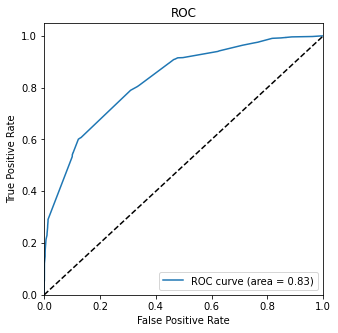

In [637]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_fin.Converted, y_train_pred_fin.Conv_Prob, drop_intermediate = False )
draw_roc(y_train_pred_fin.Converted, y_train_pred_fin.Conv_Prob)

So what can we deduce from this graph? Area under the ROC curve is 0.83, which is decent enough. We might have a good model.

In [638]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve
auc = auc_val(fpr,tpr)
auc

0.8284084271525196

For AUC values this can be said:

    0.90 - 1.00 = excellent
    0.80 - 0.90 = good
    0.70 - 0.80 = fair
    0.60 - 0.70 = poor
    0.50 - 0.60 = fail

Since our AUC value of 0.828, our model seems to be doing well on the test dataset.


In [640]:
# columns with different cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_fin[i]= y_train_pred_fin.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_fin.head()

,Converted,Conv_Prob,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.140864,0,1,1,0,0,0,0,0,0,0,0
1,0,0.369187,0,1,1,1,1,0,0,0,0,0,0
2,0,0.188736,0,1,1,0,0,0,0,0,0,0,0
3,0,0.369700,0,1,1,1,1,0,0,0,0,0,0
4,1,0.369700,0,1,1,1,1,0,0,0,0,0,0


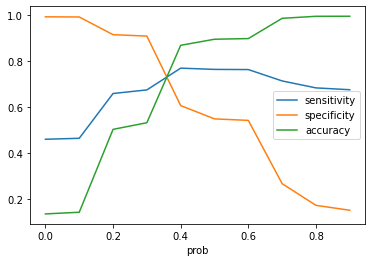

     prob  sensitivity  specificity  accuracy
0.0   0.0     0.459626     0.994199  0.133731
0.1   0.1     0.463884     0.993474  0.141026
0.2   0.2     0.659434     0.916244  0.502874
0.3   0.3     0.675089     0.910080  0.531830
0.4   0.4     0.770118     0.606599  0.869805
0.5   0.5     0.764625     0.548586  0.896331
0.6   0.6     0.763938     0.542059  0.899204
0.7   0.7     0.714227     0.265772  0.987622
0.8   0.8     0.683878     0.171139  0.996463
0.9   0.9     0.675913     0.149746  0.996684


In [641]:
cutoff = pd.DataFrame( columns = ['prob','sensitivity','specificity','accuracy'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin[i] )
    total1=sum(sum(cm1))
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff.plot.line(x='prob', y=['sensitivity','specificity','accuracy'])
plt.show()
print(cutoff)

In [642]:
#So we can see from the data above that we need to choose 0.37 as our new cutoff
y_train_pred_fin['final_predicted'] = y_train_pred_fin.Conv_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_fin.head()

,Converted,Conv_Prob,Pred_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.140864,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.369187,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.188736,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.369700,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.369700,0,1,1,1,1,0,0,0,0,0,0,0


In [643]:
#Checking accuracy again
metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted)

0.7694314748695413

In [644]:
#And we should see the confusion matrix again
conf2 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )
conf2

array([[3929,  595],
       [1084, 1674]], dtype=int64)

In [645]:
TP = conf2[1,1] 
TN = conf2[0,0]
FP = conf2[0,1]
FN = conf2[1,0]

In [646]:
#sensitivity
TP/(TP+FN)

0.6069615663524293

sensitivity is better than before

In [647]:
#specificity
TN/(TN+FP)

0.8684792219274978

In [648]:
#precision
TP/(TP+FP)

0.7377699427060379

In [649]:
precision_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )

0.7377699427060379

In [650]:
recall_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )

0.6069615663524293

In [651]:
#f1 score is the combination/harmonic mean of recall and precision
f1_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )

0.6660035806644121

In [652]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
x_test.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,626930,0,0,-0.094501,-0.103796,0.294327,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,621198,0,0,-0.706197,-0.881059,-1.080999,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,594161,1,0,-0.298400,0.424156,-0.164115,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1196,647285,0,0,0.109397,-0.105629,0.752769,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8219,587146,0,0,0.721093,-0.428267,-0.278725,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Analysing test set using our model

In [653]:
x_test_sm = sm.add_constant(x_test)

In [654]:
y_test_pred = model2.predict(x_testn)

In [655]:
y_test_pred[:10]

3504    0.369700
4050    0.960851
7201    0.369187
1196    0.369700
8219    0.343019
8747    0.188736
9048   -0.056949
6524    0.353625
7693    0.369187
8187    0.960851
dtype: float64

In [656]:
# Converting y_pred to a dataframe which is at present an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [657]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_fin = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_fin.head()

,Converted,LeadID,0
0,0,3504,0.369700
1,1,4050,0.960851
2,0,7201,0.369187
3,0,1196,0.369700
4,1,8219,0.343019


In [658]:
# Renaming the column 
y_pred_fin1= y_pred_fin.rename(columns={ 0 : 'Conv_Prob'})
# Let's see the head of y_pred_final
y_pred_fin1.head()

,Converted,LeadID,Conv_Prob
0,0,3504,0.369700
1,1,4050,0.960851
2,0,7201,0.369187
3,0,1196,0.369700
4,1,8219,0.343019


In [659]:
# Using the cutoff we used earlier
y_pred_fin1['final_predicted'] = y_pred_fin1.Conv_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_fin1.head()

,Converted,LeadID,Conv_Prob,final_predicted
0,0,3504,0.369700,0
1,1,4050,0.960851,1
2,0,7201,0.369187,0
3,0,1196,0.369700,0
4,1,8219,0.343019,0


In [672]:
# Let's check the accuracy.
acc_score=metrics.accuracy_score(y_pred_fin1.Converted, y_pred_fin1.final_predicted)
acc_score

0.7792421746293245

In [673]:
confusion_test = metrics.confusion_matrix(y_pred_fin1.Converted, y_pred_fin1.final_predicted )
print(confusion_test)

[[991 127]
 [275 428]]


#### The above result can be interpretated as:
    Prediced        not converted   converted
    actual           
    Not converted    991             127
    converted        275             428

In [661]:
# Let's look at some other metrics as well
# true positive
TP = confusion_test[1,1] 
# true negative
TN = confusion_test[0,0]
# false positive
FP = confusion_test[0,1]
# false negative
FN = confusion_test[1,0] 

#Sensitivity = True positive/(true positive+false negative)
TP/(TP+FN)

0.6088193456614509

In [662]:
#Specificity = True negative/(true negative+false positive)
TN/(TN+FP)

0.8864042933810375

These two values are comparable to the train set

In [663]:
#f1 score is the combination/harmonic mean of recall and precision
f1_score(y_pred_fin1.Converted, y_pred_fin1.final_predicted )

0.6804451510333863

This score is also similar to the train set

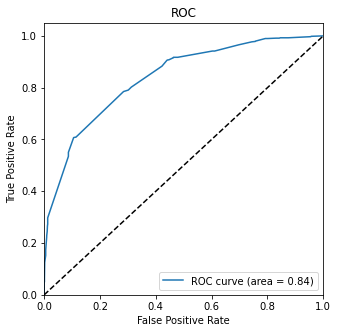

In [664]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_pred_fin1.Converted, y_pred_fin1.Conv_Prob, drop_intermediate = False )
draw_roc(y_pred_fin1.Converted, y_pred_fin1.Conv_Prob)

ROC curve is only slightly more than that we obtained with the train set

In [665]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve
auc = auc_val(fpr,tpr)
auc

0.8387348368988514

So, this score is also good for our model

Looking into feature importance

In [666]:
pd.options.display.float_format = '{:.2f}'.format
nparams = model2.params[1:]
nparams

Do Not Email                                           -0.25
Lead Origin_Lead Add Form                               0.35
Lead Source_Welingak Website                            0.18
Last Activity_Converted to Lead                        -0.19
Last Activity_Olark Chat Conversation                  -0.21
What is your current occupation_Other                   0.42
What is your current occupation_Student                 0.17
What is your current occupation_Unemployed              0.18
What is your current occupation_Working Professional    0.56
Last Notable Activity_Email Link Clicked               -0.33
Last Notable Activity_Email Opened                     -0.25
Last Notable Activity_Modified                         -0.26
Last Notable Activity_Page Visited on Website          -0.27
dtype: float64

In [667]:
#feature_importance calculation
feat_imp = nparams
feat_imp = 100.0 * (feat_imp / feat_imp.max())
feat_imp

Do Not Email                                           -44.13
Lead Origin_Lead Add Form                               62.14
Lead Source_Welingak Website                            31.74
Last Activity_Converted to Lead                        -33.27
Last Activity_Olark Chat Conversation                  -38.21
What is your current occupation_Other                   76.06
What is your current occupation_Student                 29.96
What is your current occupation_Unemployed              32.50
What is your current occupation_Working Professional   100.00
Last Notable Activity_Email Link Clicked               -58.94
Last Notable Activity_Email Opened                     -44.04
Last Notable Activity_Modified                         -46.92
Last Notable Activity_Page Visited on Website          -48.83
dtype: float64

In [669]:
#Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feat_imp,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             9
Lead Origin_Lead Add Form                               12
Lead Source_Welingak Website                            11
Last Activity_Converted to Lead                          0
Last Activity_Olark Chat Conversation                   10
What is your current occupation_Other                    4
What is your current occupation_Student                  3
What is your current occupation_Unemployed               6
What is your current occupation_Working Professional     2
Last Notable Activity_Email Link Clicked                 7
Last Notable Activity_Email Opened                       1
Last Notable Activity_Modified                           5
Last Notable Activity_Page Visited on Website            8
dtype: int64

In [670]:
pd.DataFrame(feat_imp).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
8,What is your current occupation_Working Profes...,100.00
5,What is your current occupation_Other,76.06
1,Lead Origin_Lead Add Form,62.14


In [685]:
model3=sm.OLS(y_train,x_train2_sm)
result = model3.fit()
 
feat_imp1=pd.DataFrame(result.conf_int()[1]).rename(columns={1:'Coefficients'}).eval("absolute_coefficients=abs(Coefficients)")
feat_imp1.sort_values('absolute_coefficients',ascending=False)[['absolute_coefficients']]

,absolute_coefficients
What is your current occupation_Other,0.64
What is your current occupation_Working Professional,0.60
const,0.46
Lead Origin_Lead Add Form,0.39
Lead Source_Welingak Website,0.26
Last Notable Activity_Email Link Clicked,0.26
Last Notable Activity_Modified,0.24
What is your current occupation_Student,0.23
Last Notable Activity_Email Opened,0.22
Last Notable Activity_Page Visited on Website,0.22


### Conclusion
We essentially began with a lot of features that looked like they can be particularly insightful, in order for us to understand how and why leads are getting converted. This would help us in conveying the factors to X education, so that they can use this information for choosing hot leads. 
So we shaped our analysis around this idea only. We began with more than 9000 data points, and 37 features, that had to be reduced to the most pertinent features. Therefore, we cleaned the data by treating null values by dropping a few columns, dropping NaN values, dropping columns that had most values as 'Select', and  so on. From there we moved on to mapping variables to binary values (Yes or No type of entries).
Categorical variables were hot encoded then. Thereafter, the data was split into test and train sets by keeping 'Converted' as the dependent variable. Data was then scaled down using StandardScaler.
Now we moved on to creating a model (logistic regression model) using Recursive Feature Elimination.
Model1 was further improved by analysing VIF and p-values, which led to us dropping another 2 features to create Model2. Now moving on to model evaluation, prediction values were used to create a confusion matrix, first using an arbitrary cutoff and then ROC curve was used to find a more appropriate cutoff threshold. Comparison between Accuracy, sensitivity, & specificity. Precision and recall scores were also calculated.

Top three features for X education to focus on: ‘What is your current occupation_Working Professional’, ‘What is your current occupation_Other’, &‘Lead Origin_Lead Add Form’.

Recommendations: That ideal hot leads should have maximum values for the above mentioned three features. So, such leads should be focussed on as much as possible. This can be done by informing them about new offers, newly added course, course application deadlines, course application status, job offers, and so on. The information provided to the leads would have to be designed according to the lead being followed, and for doing so the necessary data can be collected when they are being reached out to. Thereon, the leads should be monitored closely for the best possible outcome.
